In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from functions.conv1fxn import *
from functions.functions_image_training import *
import numpy as np
import tensorflow as tf
import pickle
import h5py
import os.path
import sys
import time
%matplotlib inline

//anaconda/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
mainfolder = 'images/quality_confirmed/'
rejects = 'images/rejects/'
img_dict, cat_list = classifier_folder_to_jpg_dict_list(mainfolder,rejects)
list_of_tuples = cat_list_to_list_of_tuples(img_dict, cat_list)
############### INPUTS: including bacth size, list of tuples and image dictionary###########################
total_num = len(list_of_tuples)
classes = len(img_dict)
single_input_shape = (450,450,3)
target_height,target_width,target_depth = single_input_shape

In [7]:
tensor_image = tf.placeholder("uint8", [None, None, 3])

############ Manipulations to tensors in TF variables ########################
#### Resizing tesors #################################################################
#resize_image = tf.image.resize_images(tensor_image, target_height, target_width)
model = tf.initialize_all_variables()
print('session initialized variables')

training_labels = np.zeros((total_num,classes))
training_tensors = np.zeros((total_num,target_height,target_width,target_depth))

session initialized variables


0.0


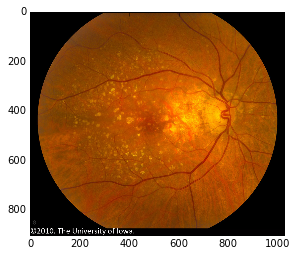

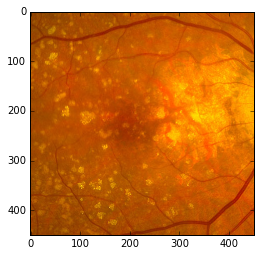

0.05263157894736842


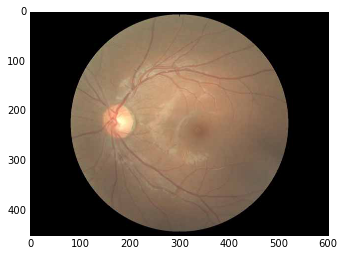

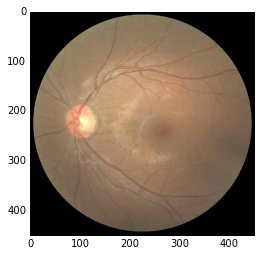

0.10526315789473684


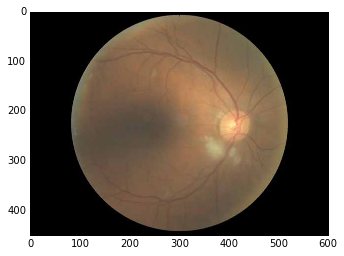

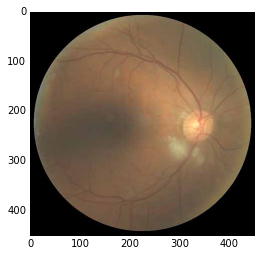

0.15789473684210525


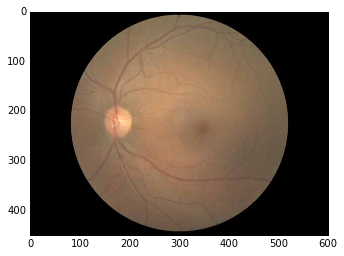

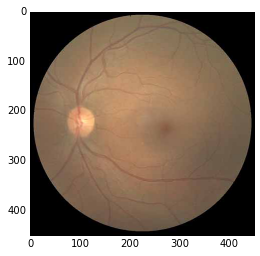

0.21052631578947367


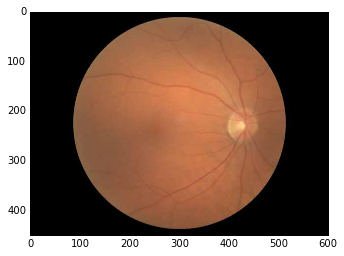

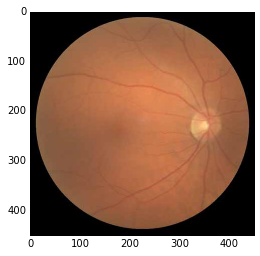

0.2631578947368421


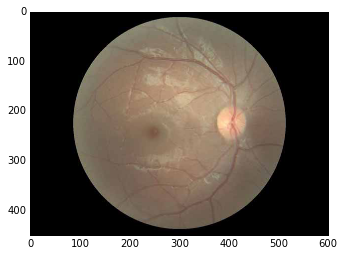

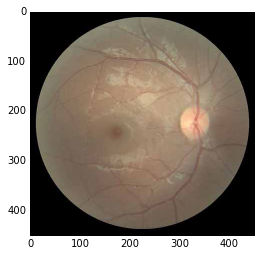

0.3157894736842105


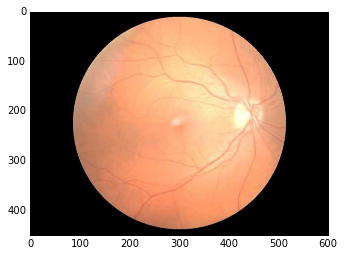

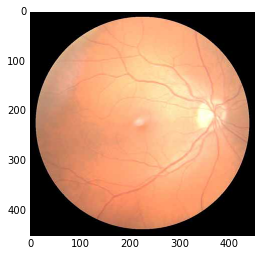

0.3684210526315789


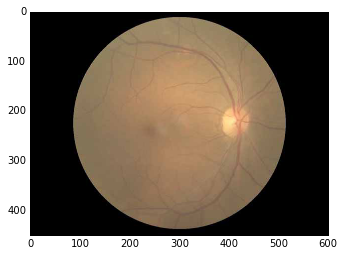

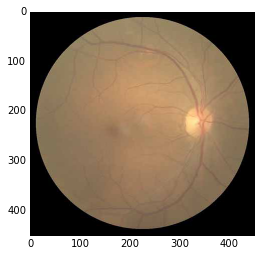

0.42105263157894735


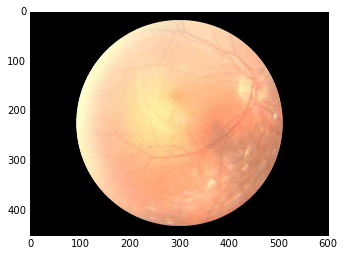

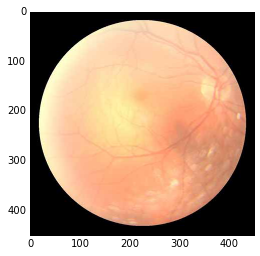

0.47368421052631576


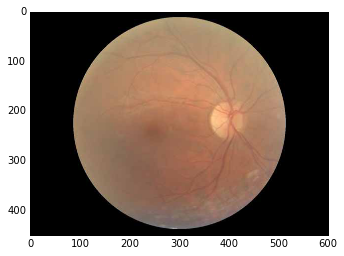

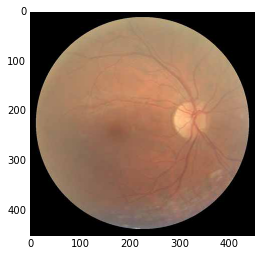

0.5263157894736842


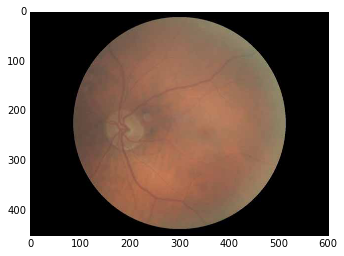

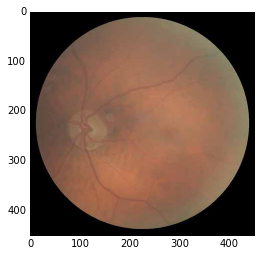

0.5789473684210527


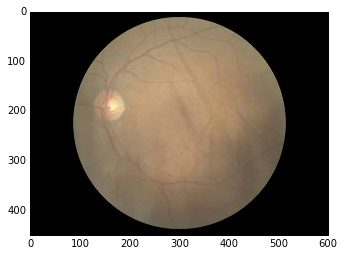

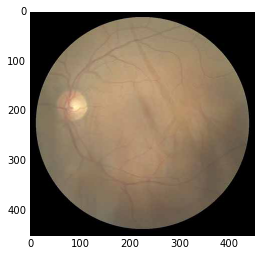

0.631578947368421


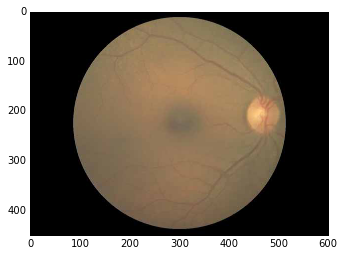

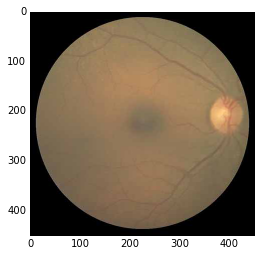

0.6842105263157895


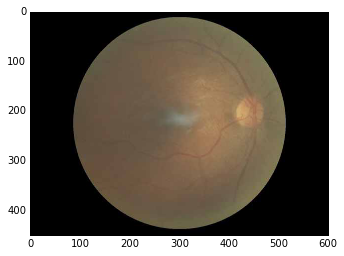

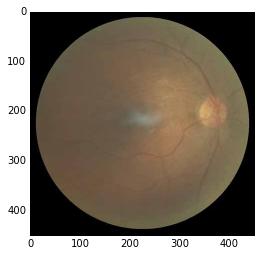

0.7368421052631579


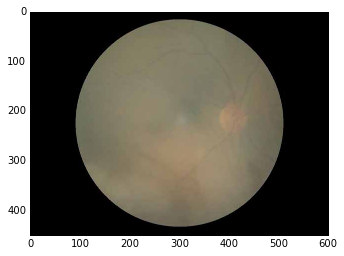

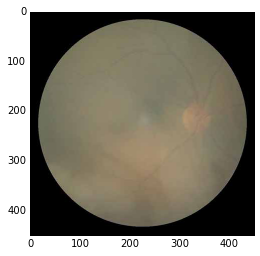

0.7894736842105263


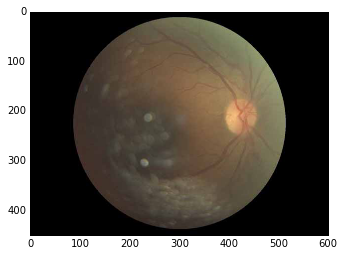

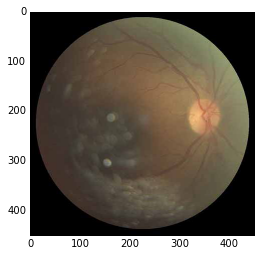

0.8421052631578947


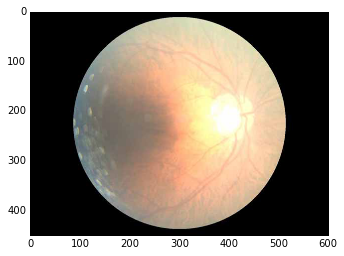

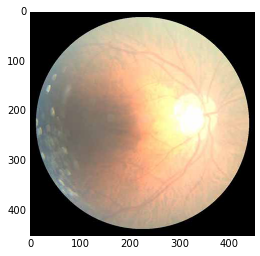

0.8947368421052632


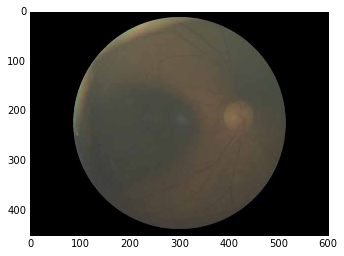

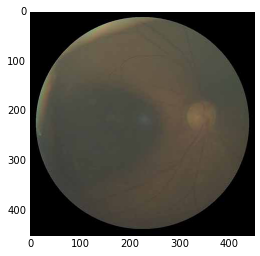

0.9473684210526315


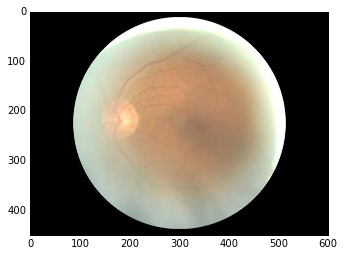

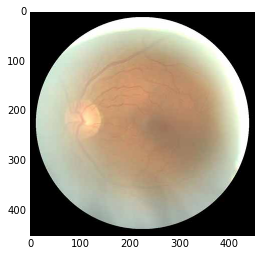

In [8]:
with tf.Session() as session: 
    
    session.run(model)
    
    for i in range(total_num):

        cycle_image = mpimg.imread(mainfolder + list_of_tuples[i][1])
        resize_image =  tf.image.resize_image_with_crop_or_pad(cycle_image, target_height, target_width)
        resized_image = session.run(resize_image, feed_dict={tensor_image: cycle_image})

        training_tensors[i] = resized_image
        training_labels[i] =list_of_tuples[i][0]

        if i %100 ==0:
            print(i/total_num)
            plt.imshow(cycle_image)
            plt.show()
            plt.imshow(resized_image)
            plt.show()

In [10]:
with h5py.File('data/qualdata3.h5', 'a') as qd:
    qd.create_dataset("training_tensors",data=training_tensors,compression="gzip")
    qd.create_dataset("training_labels",data=training_labels,compression="gzip")
    #qd.create_dataset("training_tensors",data=training_tensors,compression="gzip",compression_opts=9)
    #qd.create_dataset("training_labels",data=training_labels,compression="gzip",compression_opts=9)

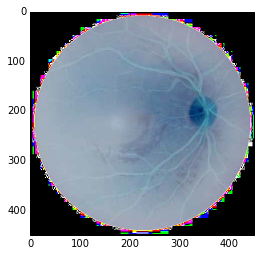

In [11]:
with h5py.File('data/qualdata3.h5', 'a') as qd:
    training_labels = np.array(qd.get('training_labels'))
    training_tensors = np.array(qd.get('training_tensors'))
plt.imshow(training_tensors[3].astype('uint8'))
plt.show()

In [15]:
training_numpy = training_tensors.astype('uint8')

NameError: name 'training_training_numpy' is not defined

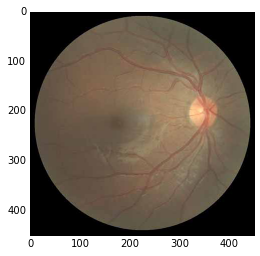

In [16]:
plt.imshow(training_numpy[3])
plt.show()